In [1]:
# Import libraries and load dataset
import os
import sys
import importlib
module_path = os.path.abspath(os.path.join('../..'))
if module_path not in sys.path:
    sys.path.append(module_path)

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statsmodels.api as sm

import common.common as common
importlib.reload(common)

df = pd.read_csv("Data.csv")

yr = list(df.yr)
df = df.set_index("yr")
df["yr"] = yr
df

,inbtou_volume_ov,inbtou_spending,covid19_cases,covid19_deaths,covid19_mortality,yr
yr,,,,,,
2010,1920000.0,2.000000e+09,0,0,0.000000,2010
2011,1950000.0,2.010000e+09,0,0,0.000000,2011
2012,1990000.0,2.070000e+09,0,0,0.000000,2012
2013,2010000.0,2.110000e+09,0,0,0.000000,2013
2014,2080000.0,2.240000e+09,0,0,0.000000,2014
2015,2120000.0,2.400000e+09,0,0,0.000000,2015
2016,2180000.0,2.610000e+09,0,0,0.000000,2016
2017,2350000.0,3.010000e+09,0,0,0.000000,2017
2018,2470000.0,3.310000e+09,0,0,0.000000,2018


Estimated COVID-19 effect: -1722666 ± 107500 (95% confidence)


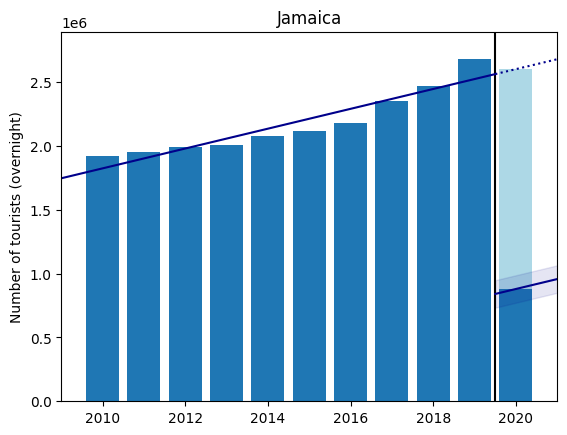

                             OLS Regression Results                             
Dep. Variable:     log_inbtou_volume_ov   R-squared:                       0.989
Model:                              OLS   Adj. R-squared:                  0.986
Method:                   Least Squares   F-statistic:                     351.6
Date:                  Wed, 26 Apr 2023   Prob (F-statistic):           1.60e-08
Time:                          15:26:14   Log-Likelihood:                 23.188
No. Observations:                    11   AIC:                            -40.38
Df Residuals:                         8   BIC:                            -39.18
Df Model:                             2                                         
Covariance Type:              nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept       -55.6174  

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/scipy/stats/_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/scipy/stats/_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/scipy/stats/_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [4]:
# Set up plot
plt.title('Jamaica')
plt.ylabel('Number of tourists (overnight)')
plt.xlim(2009, 2021)
y_name = 'inbtou_volume_ov'

# Filter out NaN data
_df = pd.DataFrame(df).loc[df[y_name].notna()]

# Generate difference-in-differences plot
effect, stderr = common.gen_did_plot(_df, y_name)
print(f"Estimated COVID-19 effect: {int(effect)} ± {int(stderr)} (95% confidence)")

# Render plot
plt.show()

# Run OLS regression
common.run_covid19_regression(_df, y_name, log_level=True)

Estimated COVID-19 effect: -2287333333 ± 253014711 (95% confidence)


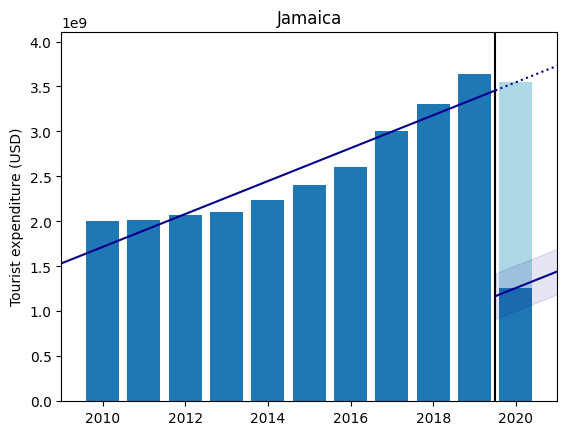

                             OLS Regression Results                            
Dep. Variable:     log_inbtou_spending   R-squared:                       0.961
Model:                             OLS   Adj. R-squared:                  0.951
Method:                  Least Squares   F-statistic:                     98.04
Date:                 Wed, 26 Apr 2023   Prob (F-statistic):           2.36e-06
Time:                         15:26:38   Log-Likelihood:                 16.289
No. Observations:                   11   AIC:                            -26.58
Df Residuals:                        8   BIC:                            -25.38
Df Model:                            2                                         
Covariance Type:             nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      -118.2851     14.314 

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/scipy/stats/_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/scipy/stats/_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/scipy/stats/_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [6]:
# Set up plot
plt.title('Jamaica')
plt.ylabel('Tourist expenditure (USD)')
plt.xlim(2009, 2021)
y_name = 'inbtou_spending'

# Filter out NaN data
_df = pd.DataFrame(df).loc[df[y_name].notna()]

# Generate difference-in-differences plot
effect, stderr = common.gen_did_plot(_df, y_name)
print(f"Estimated COVID-19 effect: {int(effect)} ± {int(stderr)} (95% confidence)")

# Render plot
plt.show()

# Run OLS regression
common.run_covid19_regression(_df, y_name, log_level=True)